Audio界的Pillow/Pandas - Librosa

In [1]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [2]:
array, sampling_rate

(array([-1.4068211e-03, -4.4607485e-04, -4.1098098e-04, ...,
         7.9623042e-06, -3.0417003e-05,  1.2765069e-05], dtype=float32),
 22050)

**Time series Graph**

In [10]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def show(signal_array, title = None, xrange:tuple = None):
    fig, ax = plt.subplots(figsize = (15,3))
    if title:
        plt.title(title)
    if xrange:
        plt.xlim(*xrange)
    plt.plot(signal_array)
    plt.show()

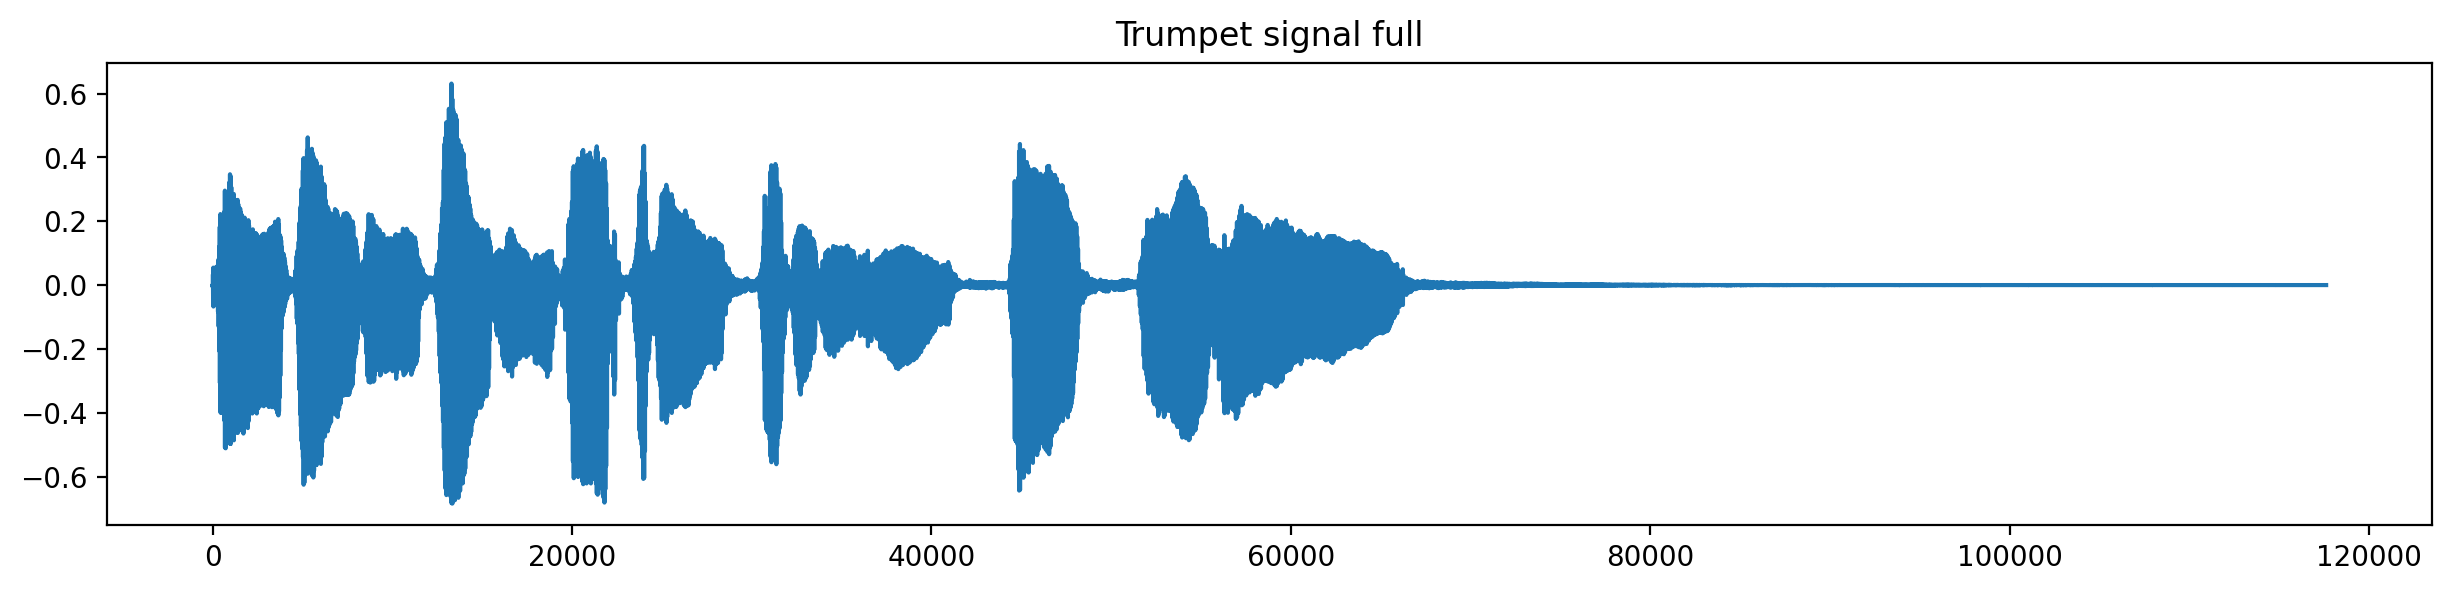

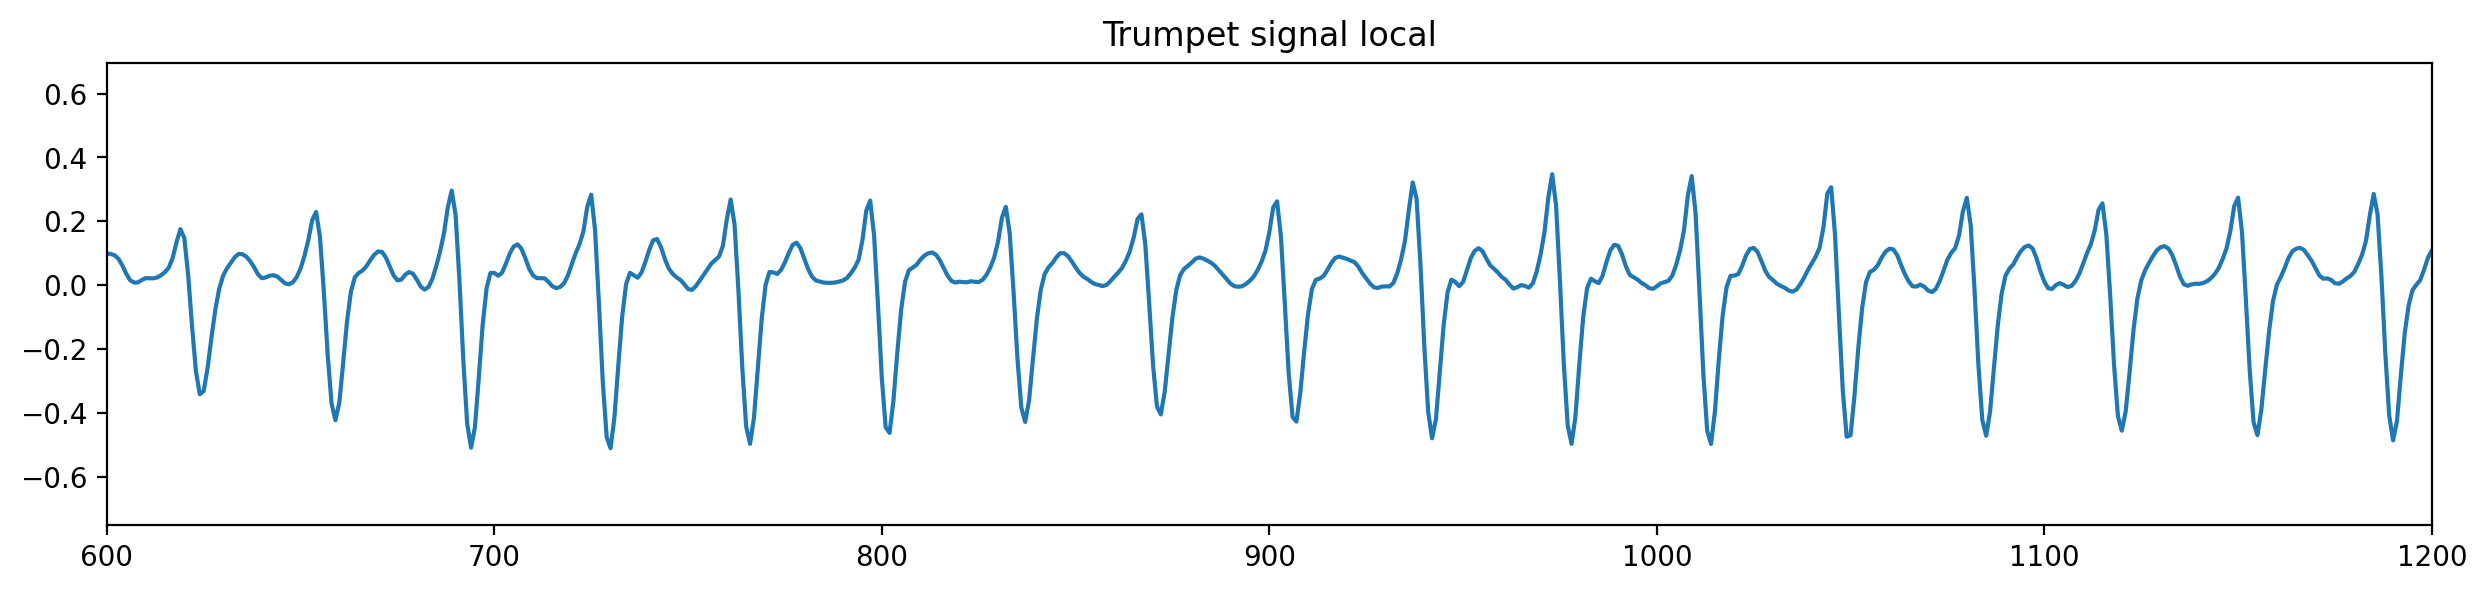

In [11]:
show(array, "Trumpet signal full")
show(array, "Trumpet signal local", (600, 1200))

放到还是可以看到，声音可以表示成一系列的三角级数的叠加

**The frequency spectrum**
1. Transform the original audio signal to a - frequency/amplitude arrays
2. Plot the amplitude of different frequencies appeared in this audio piece.

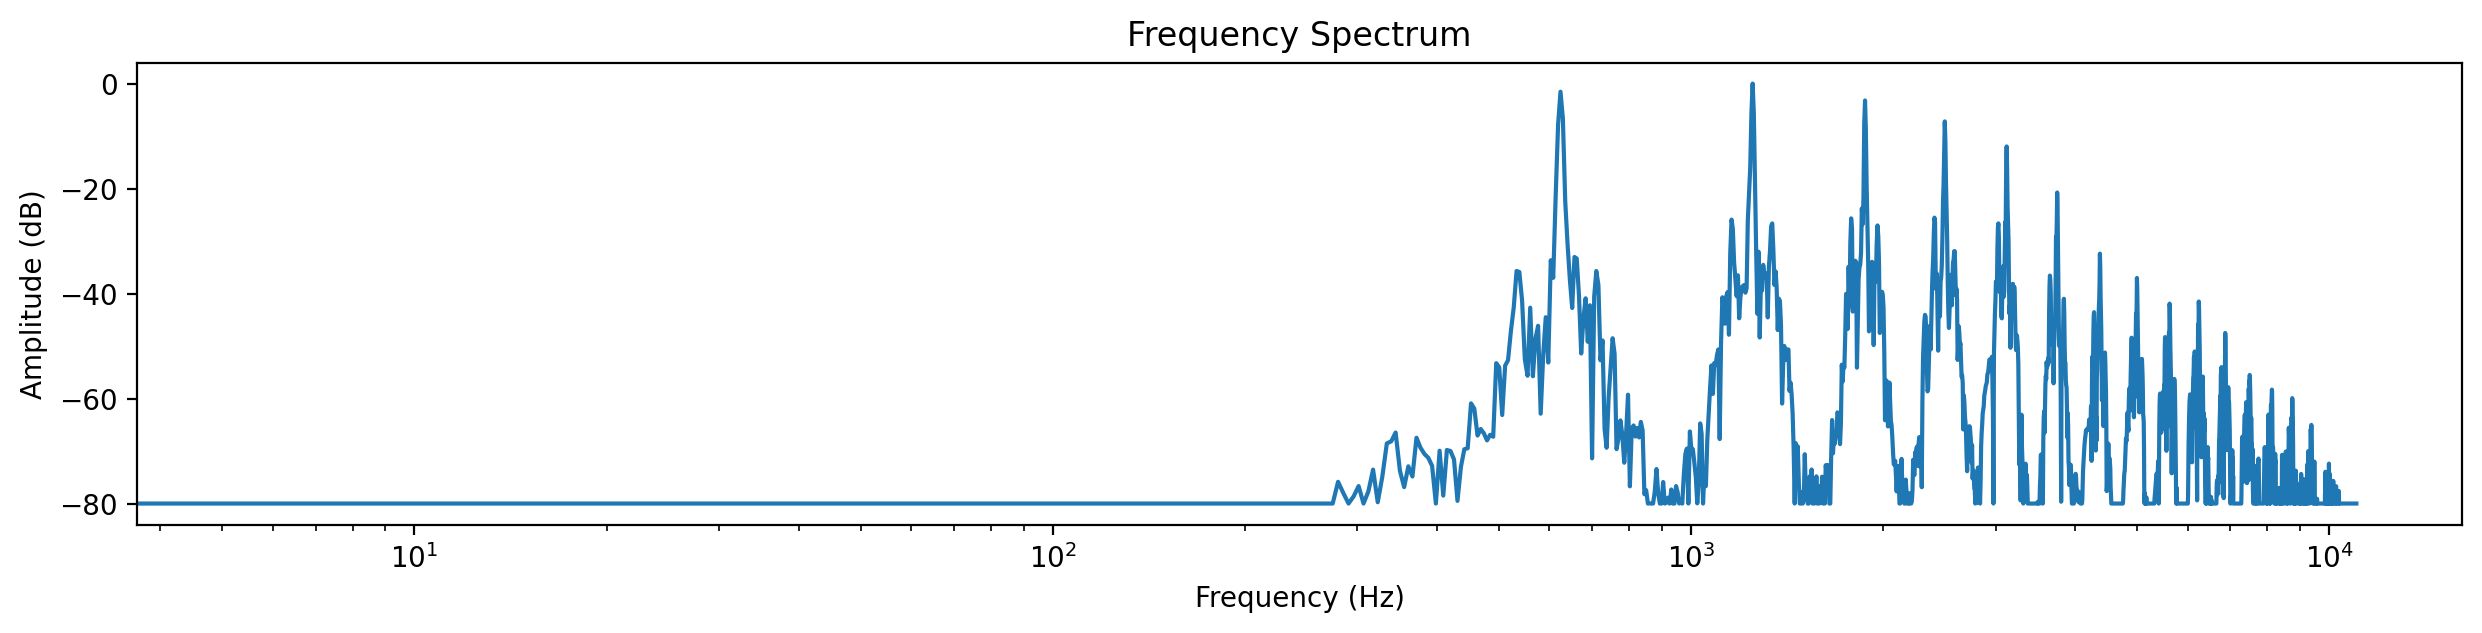

In [ ]:
import numpy as np

# 这里的4096个sample也就几毫秒，如果是16000Hz的采样率，那么4096个sample就是0.256秒
# 所以这个frequency spectrum是0.256秒的音频信号的频谱
# 代表一个瞬时的状态
dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

fig, ax = plt.subplots(figsize = (15,3))
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.title("Frequency Spectrum")
plt.xscale("log")

从音乐的角度上来说，这个频谱代表了一个和声，可以理解成最低的一个基频，和更高的泛频，高频的声音强度越来越低。

In [8]:
dft

array([ 8.43816380e-04+0.00000000e+00j, -3.44852086e-04-3.06935268e-04j,
        6.10099698e-05-9.13102971e-05j, ...,
        4.94075746e-07+1.41122484e-07j,  9.15312663e-07-1.09231195e-06j,
       -2.37169385e-06+0.00000000e+00j])

DFT的结果是一个虚数数组， 虚数的模（或称为绝对值）可以使用 Python 的 abs() 函数来计算。虚数 (a + bi) 的模是 ($\sqrt{a^2 + b^2}$),这就代表了振幅（amplitude）， 实部和虚部的夹角叫做相位，一般在机器学习中就舍弃了。 librosa.amplitude_to_db()把振幅转换为分贝。 我们想要计算DFT（离散傅立叶变换），但是在实际应用中，唯一有效的方式是使用FFT(快速傅立叶变换)，所以FFT和DFT在这个情形下经常混着叫，一个东西。    

音频的频谱和信号-时间图是对同一个数据的两种不同的解读方法。一种是看振幅随着时间变化的曲线，另一种是看在一个固定的时间点，不同频率信号的振幅。

**观察单个的频率随时间的变化，怎么搞？- Spectrogram**    
x-axis: 时间          
y-axis: 不同频率的音符            
hue: 声音的强度(db)            

从音乐4要素来说，音高(y轴)， 音值(x轴)， 音量(颜色)， 音色(没有表示), 四要素表现出了3个，这个图还是可以的。

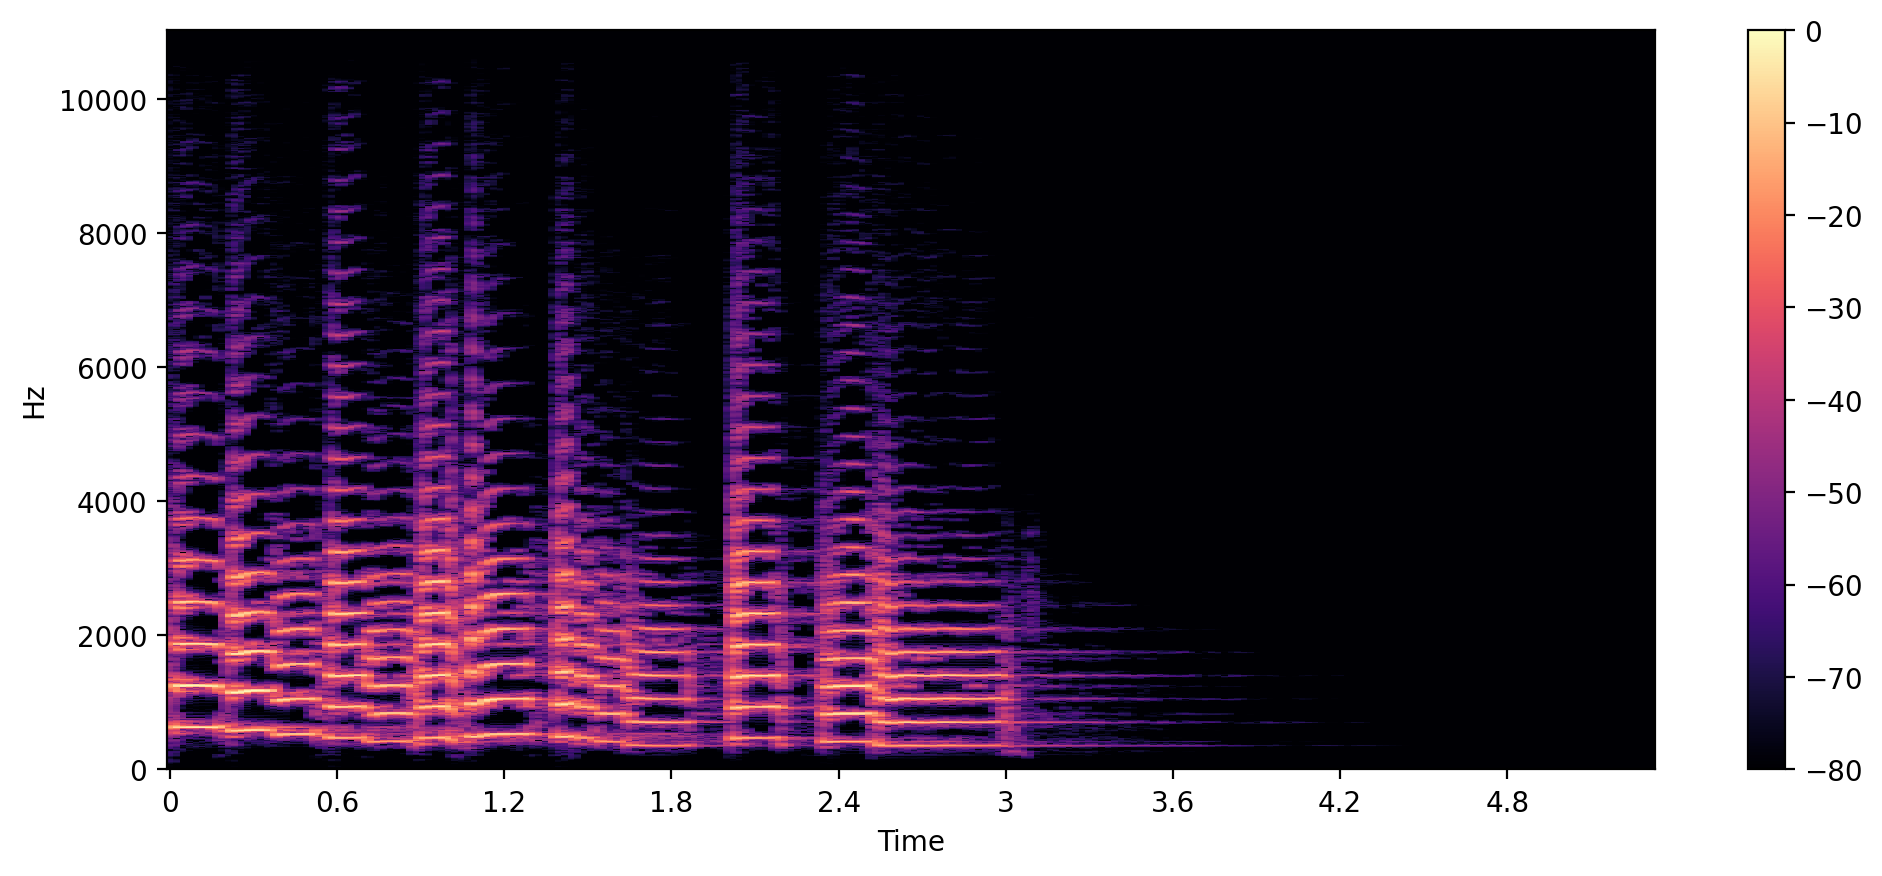

In [13]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()